# Communicate Data Findings (2017-fordgobike-tripdata)

# By Vidhyut Prajapati

# Introduction

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process.

This is the first part, here I will use Python visualization libraries to systematically explore a 2017-fordgobike-tripdata, starting from plots of single variables and building up to plots of multiple variables.

In the second part, I will produce a short presentation that illustrates interesting properties, trends, and relationships that you discovered in your selected dataset.(Provided in another file)

# Table of Contents

1. Introduction
2. Data Gathering
3. Data Assessing
4. Data Cleaning
5. Data Exploration and Analysis
6. Conclusion

# Data Gathering

- Ford GoBike is a regional public bike sharing system in San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of Bay Wheels's trip data for public use for March 2020, which you can find here.
- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from November, 2017 to December, 2017.

In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Data Gathering

In [2]:
# load dataset in dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

# Data Assessing

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [6]:
df.shape

(519700, 13)

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [11]:
#Checking for missing values using isnull()
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

# There are some data quality issues such as

- start_time and end_time columns are in string format instead of datetime format
- bike_id are in int format instead of object format
- user_type is in string format. Can be transformed into categorical variable

# What is the structure of your dataset?

Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) ###### There are 155686 records and 13 columns

# There are some data quality issues such as

- start_time and end_time columns are in string format instead of datetime format
- start_station_id, end_station_id are in float format instead of integer format
- user_type is in string format. Can be transformed into categorical variable

# What is/are the main feature(s) of interest in your dataset?

- When are most trips taken in terms of time of day, day of the week, or month of the year?
- Does the average duration depend on if a user is a subscriber or customer?
- Does the average duration depend on if a user is a subscriber or customer?

I would like to understand a bit about the patterns in terms of days in the week or in the year when rides are more frequent. Also to check at which time in the day is more common to have rides and also how all this relates with the user type.

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Trip Duration
- Start TIme
- End Time
- User Type

In [12]:
# make copy of data
df_clean = df.copy()

# Define

1) convert data formats for start_time, end_time into correct datatype (from object to datetime)

# Code

In [13]:
# convert datatype of start_time and end_time from object to datatime
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

# Define

2) convert data formats for start_station_id, end_station_id into correct one

# Code

In [15]:
#  convert datatype of start_station_id and end_station_id to int
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int')

# Test

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

# Define

3) convert data formats for user_type columns into correct one

# Code

In [17]:
# convert datatype of user_type to category
df_clean['user_type'] = df_clean['user_type'].astype('category')

# Test

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

# Define

4) convert data formats for user_type columns into correct one

# Code

In [19]:
# convert datatype of bike_id to object
df_clean['bike_id'] = df_clean['bike_id'].astype('object')

# Test

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

# Define

5) extract date,day of the week,month,minute,hour from the start_time

# Code

In [21]:
# Extract minute,day,week,month from the start_time
df_clean['duration_min'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

# Test

In [22]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335.166667,2017-12-31,16,Sunday,December
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313.333333,2017-12-31,15,Sunday,December
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762.800000,2017-12-31,22,Sunday,December
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036.200000,2017-12-31,17,Sunday,December
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726.716667,2017-12-31,14,Sunday,December


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [24]:
df_clean.start_month.value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: start_month, dtype: int64

In [25]:
df_clean.start_date.value_counts()

2017-10-26    4682
2017-11-07    4528
2017-11-14    4487
2017-10-24    4473
2017-12-06    4391
              ... 
2017-07-03     600
2017-07-04     558
2017-07-02     523
2017-07-01     475
2017-07-09     433
Name: start_date, Length: 187, dtype: int64

In [26]:
# save the cleaned data to csv file
df_clean.to_csv('fordgobike-tripdata_clean.csv',index=None)

In [27]:
main = pd.read_csv('fordgobike-tripdata_clean.csv')
main.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335.166667,2017-12-31,16,Sunday,December
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313.333333,2017-12-31,15,Sunday,December
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762.800000,2017-12-31,22,Sunday,December
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036.200000,2017-12-31,17,Sunday,December
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726.716667,2017-12-31,14,Sunday,December


In [28]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  duration_min             519700 non-null  float64
 14  star

# And the 'main' dataframe has these additional variables:

- Start Time Month
- Start Time Day of the Week
- Start Time Hour
- Start Date
- duration_min

# Data Exploration and Analysis

- In this section, I used Python visualization libraries to systematically explore trip_master dataset, starting from plots of single variables and building up to plots of multiple variables. Also, some research questions were developed, which will be answered in the Data Analysis section.

# Univariate Exploration

# What is the distribution of the number of trips by the start hour of a day?

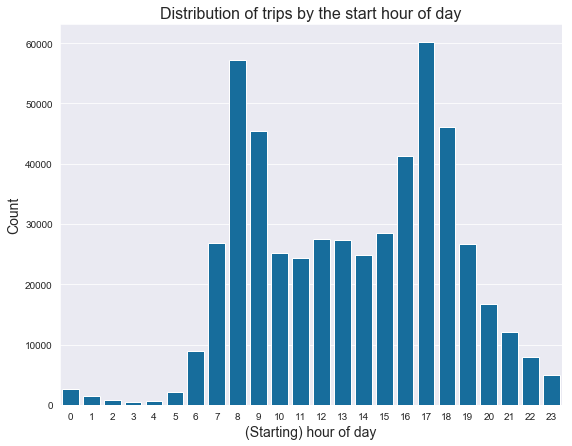

In [29]:
# Visualizing distribution of trips by hours

plt.rcParams['figure.figsize'] = 9, 7
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=main, x='start_hour_of_day', color=base_color)
plt.xlabel('(Starting) hour of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start hour of day", fontsize=16);

- The most busy hour is 5 PM, second busy hour is 8AM. The busy hours are 7-9 AM in morning and 4PM-6PM in the evening. This time is common commuting time.
- There is clearly a high usage during the peak hours when people go to school or work or they commute from it to home.

# Lets check the usage of the rides per month

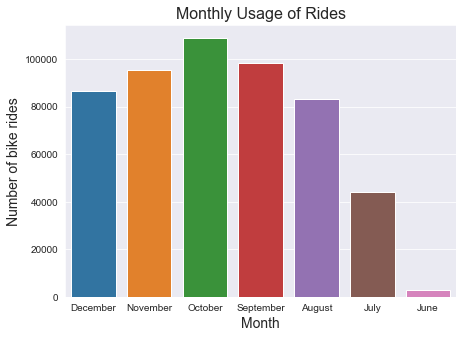

In [30]:
# Visualizing distribution of trips by hours

plt.rcParams['figure.figsize'] = 7, 5
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=main, x='start_month')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of bike rides', fontsize=14)
plt.title("Monthly Usage of Rides", fontsize=16);

- We can see from above that the distribution of rides in October month is more then any other month

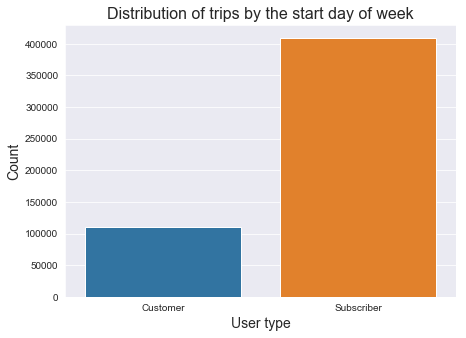

In [31]:
# Let's have a look at the number of users by user type
sb.countplot(data=main, x='user_type')
plt.xlabel('User type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);

- Majority of users are Subscribers.
- It makes sense since we saw that many rides could be from people commuting to work or school and these users will probably save money if they subscribe. In general makes sense that people that use the service frequently will prefer subscribing.

# What is the distribution of the number of trips by a day in a week?

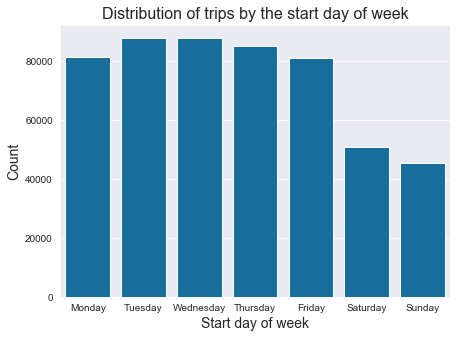

In [33]:

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
main['start_day_of_week'] = main['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=main, x='start_day_of_week', color=base_color)
plt.xlabel('Start day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);


- People use the bike less on Saturday and Sunday.
- It can clearly be seen that there is a big difference between the rides during the workweek and the rides during the weekend. This makes sense since during the weekends less people have to go to work or study as they do during the workweek.

- Something else to notice is that the frequency of rides during Monday and Friday is less than during Tuesday-Thursday. My guess is that this has to do with the fact that people try to take their vacation days in these days in order to connect those days with the weekend.

# Lets check the bike rides distributed by duration (in sec)

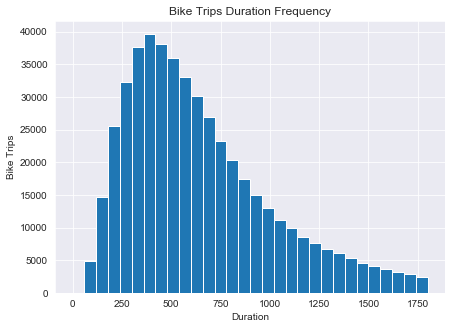

In [34]:
#Plot with the new maximum values. 
bins2 = np.arange(0, 1800+60,60)
main['duration_sec'].plot( kind = 'hist', bins = bins2)
plt.xlabel('Duration');
plt.ylabel('Bike Trips');
plt.title('Bike Trips Duration Frequency');

- Looking to distribution of plot, it's clearly skewed to right, and this shows the consumer behavior of duration seconds aren't too long, i can verify that calculating the median of the feature below:

In [35]:
#Duration_sec Median
main.duration_sec.median()

596.0

- Like i've said above, the median duration is less than 10 minutes

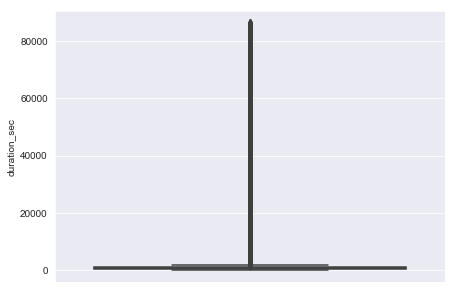

In [36]:
sb.boxplot(data=main, y='duration_sec');

That wasn't very clear, let's try a histogram

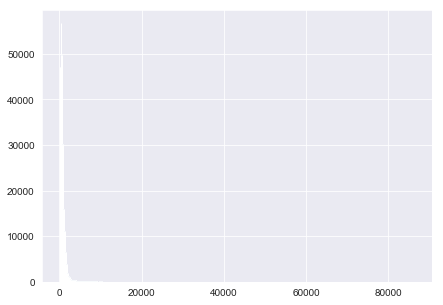

In [37]:
graph = main.duration_sec
plt.hist(graph,bins=1000);

# Add range to the histogram

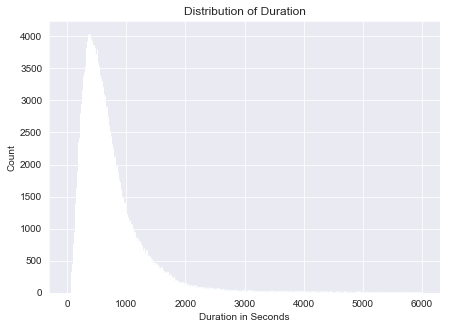

In [38]:
graph = main.duration_sec
plt.hist(graph,bins=1000,range=(0,6000));
plt.title("Distribution of Duration")
plt.xlabel('Duration in Seconds')
plt.ylabel('Count');


- Since most of the values seem to lie below 4000, let's remove the outliers, since average duration depends on trip duration being realistic. For this, I compute the Z score of each duration value and remove it if is below 3. That is, remove all values beyond two standard deviations.

In [41]:
from scipy import stats

In [42]:
main = main[(np.abs(stats.zscore(main.duration_sec)) < 3)]

In [43]:
main.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration_min,start_hour_of_day
count,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000,514555.000000
mean,829.409134,95.083387,37.771635,-122.363929,92.184363,37.771821,-122.363227,1673.800293,13.823486,13.468920
std,984.135445,85.979249,0.086270,0.105537,84.817561,0.086189,0.105083,971.290846,16.402257,4.617337
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1.016667,0.000000
25%,380.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,789.000000,6.333333,9.000000
50%,591.000000,67.000000,37.782411,-122.398870,66.000000,37.783813,-122.398525,1730.000000,9.850000,14.000000
75%,923.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2522.000000,15.383333,17.000000
max,11431.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,190.516667,23.000000


- 99% records are retained and the max is much closer to 75% of the values

# Average Duration is :

In [51]:
main.duration_sec.mean()

829.4091341061694

In [52]:
# Let's have a look at the outliers in duration_min
outliers = main.query('duration_min >= 77')
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7795 entries, 5 to 519636
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   duration_sec             7795 non-null   int64   
 1   start_time               7795 non-null   object  
 2   end_time                 7795 non-null   object  
 3   start_station_id         7795 non-null   int64   
 4   start_station_name       7795 non-null   object  
 5   start_station_latitude   7795 non-null   float64 
 6   start_station_longitude  7795 non-null   float64 
 7   end_station_id           7795 non-null   int64   
 8   end_station_name         7795 non-null   object  
 9   end_station_latitude     7795 non-null   float64 
 10  end_station_longitude    7795 non-null   float64 
 11  bike_id                  7795 non-null   int64   
 12  user_type                7795 non-null   object  
 13  duration_min             7795 non-null   float64 
 14  start_

- We have 7795 outliers in terms of duration (minutes) of a trip

In [53]:
outliers.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month
219629,4776,2017-10-21 14:52:56.982,2017-10-21 16:12:33.104,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,14,Clay St at Battery St,37.795001,-122.399970,239,Customer,79.600000,2017-10-21,14,Saturday,October
237729,7048,2017-10-16 15:35:38.881,2017-10-16 17:33:07.265,6,The Embarcadero at Sansome St,37.804770,-122.403234,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1027,Customer,117.466667,2017-10-16,15,Monday,October
469663,9081,2017-08-02 09:27:10.039,2017-08-02 11:58:31.807,119,18th St at Noe St,37.761047,-122.432642,125,20th St at Bryant St,37.759200,-122.409851,1732,Customer,151.350000,2017-08-02,9,Wednesday,August
384837,7057,2017-09-02 18:05:38.037,2017-09-02 20:03:15.733,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,2388,Customer,117.616667,2017-09-02,18,Saturday,September
489943,7239,2017-07-22 15:50:43.125,2017-07-22 17:51:22.293,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,1040,Customer,120.650000,2017-07-22,15,Saturday,July
490529,7603,2017-07-22 11:19:07.341,2017-07-22 13:25:51.201,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6,The Embarcadero at Sansome St,37.804770,-122.403234,1255,Customer,126.716667,2017-07-22,11,Saturday,July
380033,7914,2017-09-05 06:31:41.259,2017-09-05 08:43:36.113,77,11th St at Natoma St,37.773507,-122.416040,41,Golden Gate Ave at Polk St,37.781270,-122.418740,2068,Subscriber,131.900000,2017-09-05,6,Tuesday,September
406503,5784,2017-08-26 13:28:10.830,2017-08-26 15:04:34.967,7,Frank H Ogawa Plaza,37.804562,-122.271738,162,Franklin St at 9th St,37.800516,-122.272080,1392,Customer,96.400000,2017-08-26,13,Saturday,August
106822,7067,2017-11-24 09:06:50.979,2017-11-24 11:04:38.030,133,Valencia St at 22nd St,37.755213,-122.420975,8,The Embarcadero at Vallejo St,37.799953,-122.398525,2441,Customer,117.783333,2017-11-24,9,Friday,November
246862,6005,2017-10-13 10:34:57.091,2017-10-13 12:15:02.362,71,Broderick St at Oak St,37.773063,-122.439078,71,Broderick St at Oak St,37.773063,-122.439078,2929,Customer,100.083333,2017-10-13,10,Friday,October


When did the outlier cases happened?

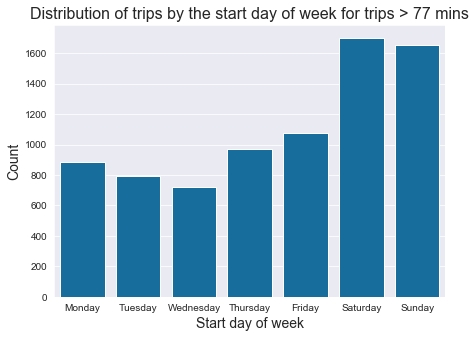

In [54]:
sb.countplot(data=outliers, x='start_day_of_week',color=base_color)
plt.xlabel('Start day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week for trips > 77 mins", fontsize=16);

- It shows that people spend more time in bike during weekends.

# At what time do we get the outlier cases?¶

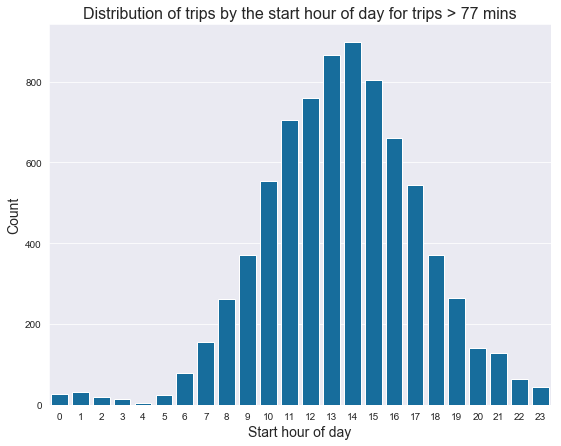

In [56]:

plt.rcParams['figure.figsize'] = 9, 7
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=outliers, x='start_hour_of_day', color=base_color)
plt.xlabel('Start hour of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start hour of day for trips > 77 mins", fontsize=16);

- longer trips (>77 mins) will be more likely from 11 AM to 3 PM.

# Insights from univariate data exploration


- The most busy hour is 5 PM, second busy hour is 8AM. The busy hours are 7-9 AM in morning and 4PM-6PM in the evening. This time is common commuting time.
- On Saturdays and Sundays people tend to use the bike service less
- Majority of the useres were subscribers.
- Overall, people tend to rent a bike for less than an hour
- Longer periods of use (> 77 mins) are associated with weekends
- Longer trips (>77 mins) will be more likely from 12 PM to 4 PM.

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


- Duration in seconds had a lot of outliers which were trimmed using Z score as the determinant.
- Duration in minutes also had outliers which is analysis for trips > 77 mins.


# The features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


- One of the most interesting observations was the relationship between user type and start hour of the trip. While Subscribers rented it in the mornings and evenings, Customers rented it sporadically, peaking slightly in the afternoon, suggesting that Subscribers used the bikes as a mode of transport for work

# Bivariate Exploration


- How much time do each user group tend to spend in a trip? Is there any difference?



# Here are some of the combinations we shall be exploring :


- Start_day_of_week and User Type
- Hourly and User Type
- User Type and Duration_sec
- Monthly and User Type


# Is there any difference in weekly usage between type of users?

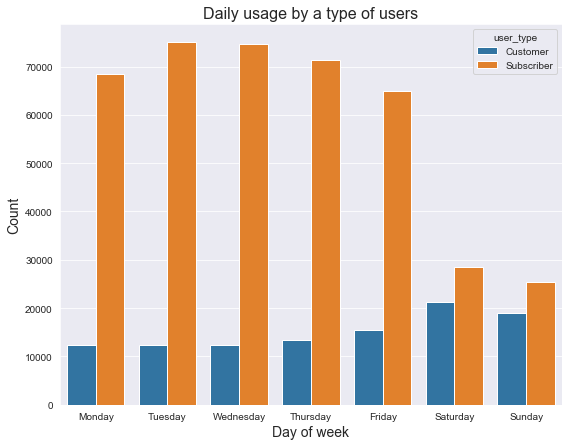

In [57]:
plt.rcParams['figure.figsize'] = 9, 7
sb.countplot(data=main, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Daily usage by a type of users", fontsize=16);

- Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday

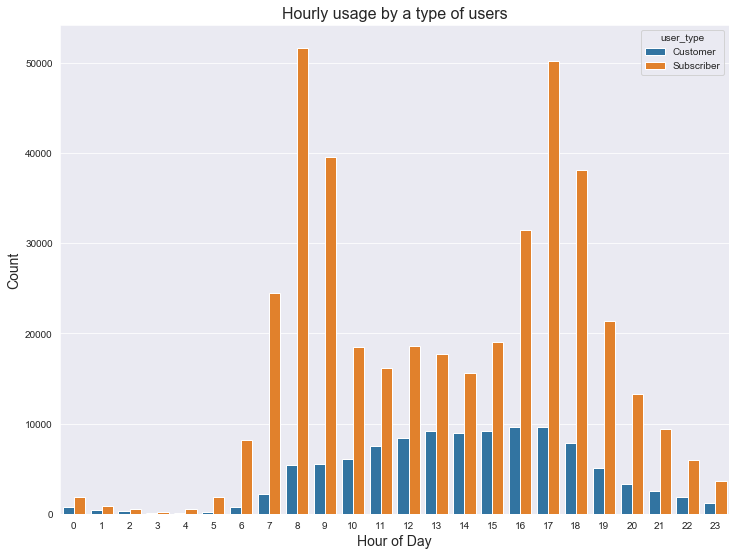

In [58]:
# Hourly usage by a user type
plt.rcParams['figure.figsize'] = 12, 9
sb.countplot(data=main, x='start_hour_of_day', hue='user_type');
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Hourly usage by a type of users", fontsize=16);

- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use bike at rush a hours.

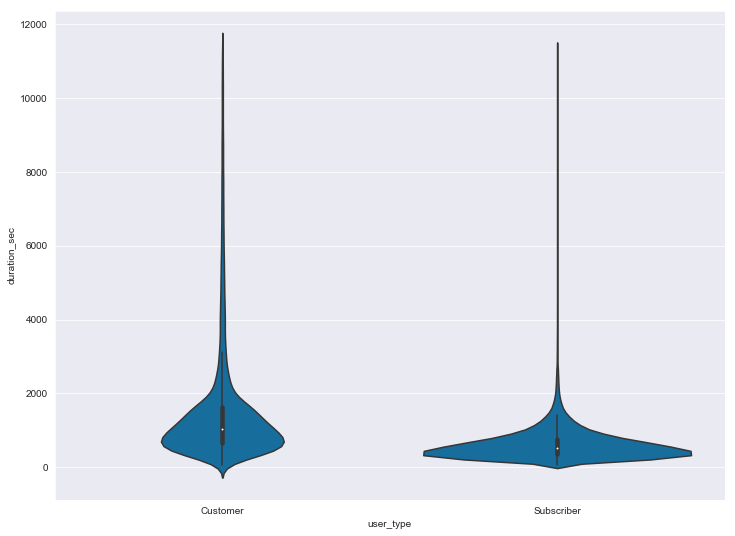

In [59]:
# User Type and Duration
sb.violinplot(data=main,x='user_type',y='duration_sec', color=base_color);

- subscribers seem to finish their trips faster than customers

# Does the average duration depend on if a user is a subscriber or customer?

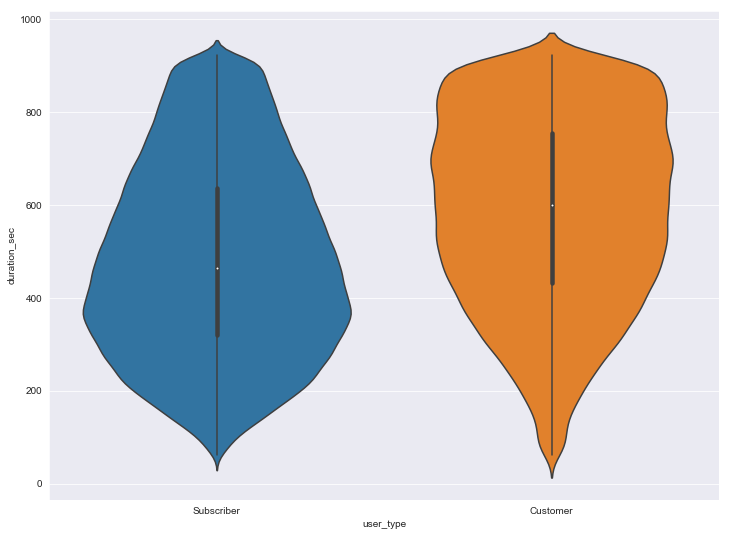

In [60]:
sb.violinplot(data=main[main.duration_sec<=923],x='user_type',y='duration_sec');

- Seems like duration is higher if the user type is a one time customer. However, this might also be dependent on the distance between locations, so an average should be taken over location to location and plotted

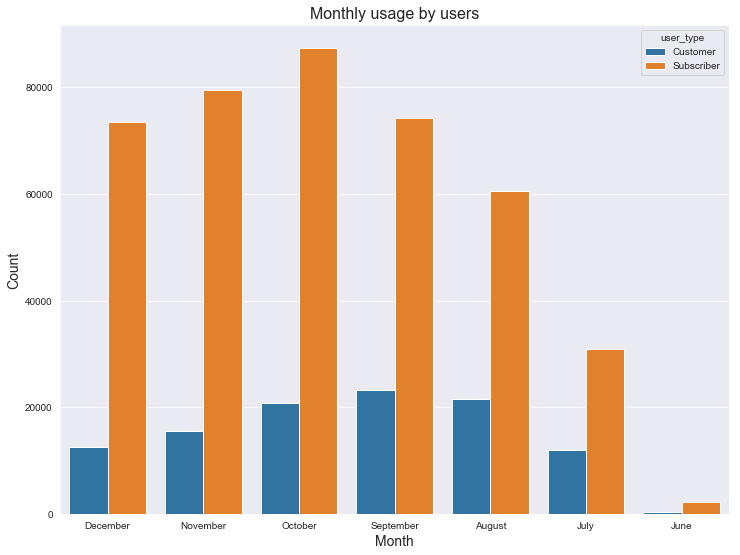

In [61]:
# User Type and Month
plt.rcParams['figure.figsize'] = 12, 9
sb.countplot(data=main, x='start_month', hue='user_type');
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Monthly usage by users", fontsize=16);

- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use more bike in december month.

# Insights from bivariate data exploration


- Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday
- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use bike at rush a hours.
- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use more bike in december month.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


- It is already established that subscribers seem to finish their trips faster than customers, the 1st plot further reinforces that point.

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


- There seems to be an interesting relationship between the time taken to complete a trip and the starting hour. Probably an indication of traffic.

# Multivariate Exploration

- Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

# Here are some of the combinations we shall be exploring :

- User Type, start_day_of_week and Duration in Seconds
- User Type, start_hour_of_day and Duration in Seconds

/Users/vidhyutprajapati/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


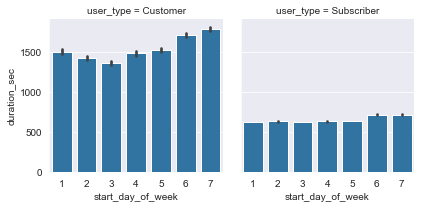

In [62]:
g = sb.FacetGrid(data=main, col='user_type')
days = [ '1', '2', '3', '4', '5', 
             '6', '7']
g.map(sb.barplot,'start_day_of_week','duration_sec');
g.set_xticklabels(days)
plt.tight_layout();

- Trip duration for customers is larger than for subscribers. Also, it is clear that subscribers spend less time in a trip than customers. Both of the user types have an increasing trend for the average time for a trip by the end of a week.

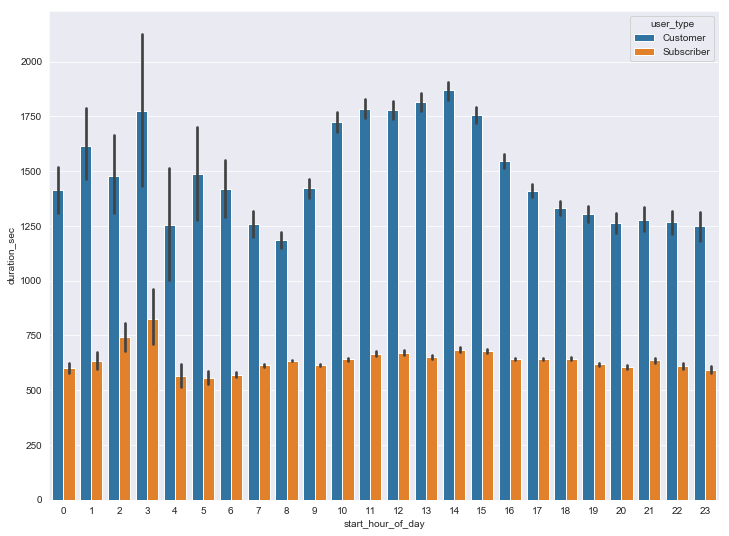

In [63]:
sb.barplot(data=main, x='start_hour_of_day',y='duration_sec',hue='user_type');


# Q2: How does the hourly usage vary during a week for customers and subscribers?

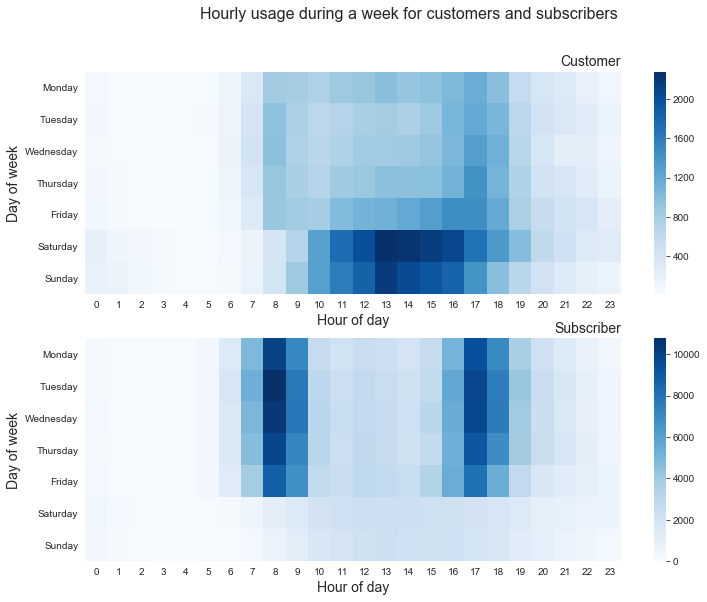

In [64]:
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

plt.subplot(2, 1, 1)
customers = main.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = main.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

- It is interesting, that customers tend to use the bike service mostly on Sunday from 12 PM to 4 PM, while subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 4 PM - 6 PM).

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- Sure. Definitely each of these graphs reinforces the general hypothesis that customers are more like recreational users and suscribers tend to be people that use them to go to work or school. But the last (multivariate explorations) help us get even more detail about the patterns of use and the differences between customers and suscribers.

# Were there any interesting or surprising interactions between features?
- Sure. For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and the month of the year.As expected, trip data seems to be most during the 9 am to 6 pm timeline, across stations with high traffic.

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_fork_bike.ipynb'])

0

In [ ]:
!jupyter nbconvert exploration_fork_bike.ipynb --to slides --post serve --template output_toggle